In [17]:
#Importing required Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [18]:
dataset = pd.read_csv("/content/Student feedback.csv",encoding='latin1') 

In [19]:
dataset.head()

,Review,Liked
0,privacy at least put some option appear offli...,0
1,"messenger issues ever since the last update, ...",0
2,profile any time my wife or anybody has more ...,0
3,the new features suck for those of us who don...,0
4,forced reload on uploading pic on replying co...,0


In [20]:
# Checking data types of each columns
dataset.dtypes

Review    object
Liked      int64
dtype: object

In [21]:
dataset.isna().sum()

Review    0
Liked     0
dtype: int64

In [22]:
# Last five rows in data
dataset.tail()

,Review,Liked
886,loved it i loooooooooooooovvved it because it...,1
887,all time legendary game the birthday party le...,1
888,ads are way to heavy listen to the bad review...,0
889,fun works perfectly well. ads aren't as annoy...,1
890,they're everywhere i see angry birds everywhe...,1


Data Preprocessing

In [23]:
nltk.download('stopwords')
corpus = [] 
for i in range(0,891):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review=review.split() 
    ps=PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] 
    review=' '.join(review) 
    corpus.append(review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Creating the Bag of Words model

In [24]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

In [25]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(534, 1500)
(534,)
(357, 1500)
(357,)


#Clasiification

### Navie Bayes

In [27]:
!pip install numpy 
!pip install scipy

In [28]:
import sklearn.metrics as mt

In [29]:
# Naive Bayes 
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train) 
y_pred_NB = NB_classifier.predict(X_test) 

In [30]:
accuracy_score(y_test, y_pred_NB) 

0.7198879551820728

In [31]:
print(classification_report(y_test, y_pred_NB)) 

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       233
           1       0.61      0.55      0.58       124

    accuracy                           0.72       357
   macro avg       0.69      0.68      0.68       357
weighted avg       0.71      0.72      0.72       357



In [32]:
# confusion matrix 
cm = confusion_matrix(y_test,y_pred_NB)
print(confusion_matrix(y_test,y_pred_NB))

[[189  44]
 [ 56  68]]


In [33]:
# importing r2_score module
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_pred_NB) 
print('r2 socre is ',score) 
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred_NB))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred_NB)))

r2 socre is  -0.23563616225944894
mean_sqrd_error is== 0.2801120448179272
root_mean_squared error of is== 0.5292561240249631


###MulitinomialNB

In [95]:
from sklearn.naive_bayes import MultinomialNB
# MultinomialNB
for dep in range(1,50,5):
  Multi_NB_classifier = MultinomialNB(fit_prior=dep)
  Multi_NB_classifier.fit(X_train, y_train)
  y_pred_MultiNB = Multi_NB_classifier.predict(X_test)
  
  print("Depth: ",dep)
  print(accuracy_score(Multi_NB_classifier.predict(X_train),y_train))
  print(accuracy_score(y_pred_MultiNB,y_test))

Depth:  1
0.9288389513108615
0.7815126050420168
Depth:  6
0.9288389513108615
0.7815126050420168
Depth:  11
0.9288389513108615
0.7815126050420168
Depth:  16
0.9288389513108615
0.7815126050420168
Depth:  21
0.9288389513108615
0.7815126050420168
Depth:  26
0.9288389513108615
0.7815126050420168
Depth:  31
0.9288389513108615
0.7815126050420168
Depth:  36
0.9288389513108615
0.7815126050420168
Depth:  41
0.9288389513108615
0.7815126050420168
Depth:  46
0.9288389513108615
0.7815126050420168


In [98]:
accuracy_score(y_test, y_pred_MultiNB)

0.7815126050420168

In [91]:
print(classification_report(y_test, y_pred_MultiNB)) 

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       233
           1       0.71      0.64      0.67       124

    accuracy                           0.78       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.78      0.78      0.78       357



In [92]:
# predicting the accuracy score
score=r2_score(y_test,y_pred_MultiNB) 
print('r2 socre is ',score) 
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred_MultiNB))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred_MultiNB)))

r2 socre is  0.036203793437629805
mean_sqrd_error is== 0.2184873949579832
root_mean_squared error of is== 0.4674263524428027


### Random Forest

In [44]:
tr =[]
te =[]

# Random Forest
for dep in range(1,50,5):
  rf_classifier = RandomForestClassifier(n_estimators = dep, criterion = 'entropy', random_state = 0)
  rf_classifier.fit(X_train, y_train)
  y_pred_rf = rf_classifier.predict(X_test)
  tr.append(accuracy_score(rf_classifier.predict(X_train),y_train))
  te.append(accuracy_score(y_pred_NB,y_test))
  print("Depth: ",dep)
  print(accuracy_score(rf_classifier.predict(X_train),y_train))
  print(accuracy_score(y_pred_NB,y_test))

Depth:  1
0.8539325842696629
0.7198879551820728
Depth:  6
0.9794007490636704
0.7198879551820728
Depth:  11
0.99812734082397
0.7198879551820728
Depth:  16
0.9962546816479401
0.7198879551820728
Depth:  21
1.0
0.7198879551820728
Depth:  26
0.99812734082397
0.7198879551820728
Depth:  31
1.0
0.7198879551820728
Depth:  36
1.0
0.7198879551820728
Depth:  41
1.0
0.7198879551820728
Depth:  46
1.0
0.7198879551820728


In [47]:
# accuracy score
accuracy_score(y_test, y_pred_rf) 

0.7535014005602241

In [48]:
print(classification_report(y_test, y_pred_rf)) 

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       233
           1       0.66      0.60      0.63       124

    accuracy                           0.75       357
   macro avg       0.73      0.72      0.72       357
weighted avg       0.75      0.75      0.75       357



In [49]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred_rf) 
print(confusion_matrix(y_test,y_pred_rf))

[[194  39]
 [ 49  75]]


In [50]:
# predicting the r2 score
score=r2_score(y_test,y_pred_rf) 
print('r2 socre is ',score) 
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred_rf))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

r2 socre is  -0.08735982278831522
mean_sqrd_error is== 0.24649859943977592
root_mean_squared error of is== 0.49648625302195015


### Support Vector Machine

In [78]:
#Support Vector Machine 
tr1 =[]
te1 =[]

for dep in range(1,500,50):
  SVC_classifier = SVC(degree=dep ,kernel = 'rbf') 
  SVC_classifier.fit(X_train, y_train)
  y_pred_SVC = SVC_classifier.predict(X_test)
  tr1.append(accuracy_score(SVC_classifier.predict(X_train),y_train))
  te1.append(accuracy_score(y_pred_SVC,y_test))
  print("Depth: ",dep)
  print("Accuracy for Train: ",accuracy_score(SVC_classifier.predict(X_train),y_train))
  print("Accuracy for Test: ",accuracy_score(y_pred_SVC,y_test))

Depth:  1
Accuracy for Train:  0.9625468164794008
Accuracy for Test:  0.7759103641456583
Depth:  51
Accuracy for Train:  0.9625468164794008
Accuracy for Test:  0.7759103641456583
Depth:  101
Accuracy for Train:  0.9625468164794008
Accuracy for Test:  0.7759103641456583
Depth:  151
Accuracy for Train:  0.9625468164794008
Accuracy for Test:  0.7759103641456583
Depth:  201
Accuracy for Train:  0.9625468164794008
Accuracy for Test:  0.7759103641456583
Depth:  251
Accuracy for Train:  0.9625468164794008
Accuracy for Test:  0.7759103641456583
Depth:  301
Accuracy for Train:  0.9625468164794008
Accuracy for Test:  0.7759103641456583
Depth:  351
Accuracy for Train:  0.9625468164794008
Accuracy for Test:  0.7759103641456583
Depth:  401
Accuracy for Train:  0.9625468164794008
Accuracy for Test:  0.7759103641456583
Depth:  451
Accuracy for Train:  0.9625468164794008
Accuracy for Test:  0.7759103641456583


In [52]:
# accuracy score
accuracy_score(y_test, y_pred_SVC)

0.7759103641456583

In [53]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       233
           1       0.76      0.52      0.62       124

    accuracy                           0.78       357
   macro avg       0.77      0.72      0.73       357
weighted avg       0.77      0.78      0.76       357



In [54]:
# confusion matrix 
cm = confusion_matrix(y_test,y_pred_SVC)
print(confusion_matrix(y_test,y_pred_SVC))

[[212  21]
 [ 59  65]]


In [55]:
# predicting the r2 score
score=r2_score(y_test,y_pred_SVC)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred_SVC))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred_SVC)))

r2 socre is  0.011491070192440778
mean_sqrd_error is== 0.22408963585434175
root_mean_squared error of is== 0.4733810683311509


###LogisticRegression

In [102]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
LogistReg_classifier = LogisticRegression()
LogistReg_classifier.fit(X_train,y_train)
y_pred_LG = classifier.predict(X_test)

In [103]:
accuracy_score(y_test, y_pred_LG) 

0.6526610644257703

In [104]:
print(classification_report(y_test, y_pred_LG)) 

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       233
           1       0.00      0.00      0.00       124

    accuracy                           0.65       357
   macro avg       0.33      0.50      0.39       357
weighted avg       0.43      0.65      0.52       357



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
# predicting the r2 score
score=r2_score(y_test,y_pred_LG)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred_LG))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred_LG)))

r2 socre is  -0.5321888412017168
mean_sqrd_error is== 0.3473389355742297
root_mean_squared error of is== 0.5893546772311472


### KNN

In [84]:
# KNN (k-Nearest Neighbours)
from sklearn.neighbors import KNeighborsClassifier

for dep in range(1,500,50):
  classifier = KNeighborsClassifier(n_neighbors =dep, metric="minkowski",p=2)
  classifier.fit(X_train,y_train)
  y_pred_KNN = classifier.predict(X_test)

  print("Depth: ",dep)
  print(accuracy_score(classifier.predict(X_train),y_train))
  print(accuracy_score(y_pred_KNN,y_test))

Depth:  1
1.0
0.6106442577030813
Depth:  51
0.3464419475655431
0.35014005602240894
Depth:  101
0.350187265917603
0.36134453781512604
Depth:  151
0.5636704119850188
0.5434173669467787
Depth:  201
0.6704119850187266
0.6554621848739496
Depth:  251
0.6573033707865169
0.6526610644257703
Depth:  301
0.6573033707865169
0.6526610644257703
Depth:  351
0.6573033707865169
0.6526610644257703
Depth:  401
0.6573033707865169
0.6526610644257703
Depth:  451
0.6573033707865169
0.6526610644257703


In [57]:
accuracy_score(y_test, y_pred_KNN) 

0.6526610644257703

In [58]:
print(classification_report(y_test, y_pred_KNN)) 

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       233
           1       0.00      0.00      0.00       124

    accuracy                           0.65       357
   macro avg       0.33      0.50      0.39       357
weighted avg       0.43      0.65      0.52       357



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred_KNN)
print(confusion_matrix(y_test,y_pred_KNN)) 

[[233   0]
 [124   0]]


In [60]:
# predicting the r2 score
score=r2_score(y_test,y_pred_KNN)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred_KNN))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred_KNN)))

r2 socre is  -0.5321888412017168
mean_sqrd_error is== 0.3473389355742297
root_mean_squared error of is== 0.5893546772311472


### Perceptron

In [61]:
# Perceptron
from sklearn.linear_model import Perceptron
classifier_pe = Perceptron()
classifier_pe.fit(X_train,y_train)

# predictiong testset
y_pred_ptorn = classifier_pe.predict(X_test)



In [69]:
# accuracy score
accuracy_score(y_test, y_pred_ptorn)
accu_pe=accuracy_score(y_test, y_pred_ptorn)
accu_pe

0.7507002801120448

In [63]:
print(classification_report(y_test, y_pred_ptorn))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       233
           1       0.62      0.73      0.67       124

    accuracy                           0.75       357
   macro avg       0.73      0.74      0.73       357
weighted avg       0.76      0.75      0.75       357



In [64]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred_ptorn)
print(confusion_matrix(y_test,y_pred_ptorn))

[[178  55]
 [ 34  90]]


In [65]:
# predicting the r2 score
score=r2_score(y_test,y_pred_ptorn) 
print('r2 socre is ',score) 
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred_ptorn)) 
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred_ptorn)))

r2 socre is  -0.09971618441090957
mean_sqrd_error is== 0.24929971988795518
root_mean_squared error of is== 0.49929922880769123


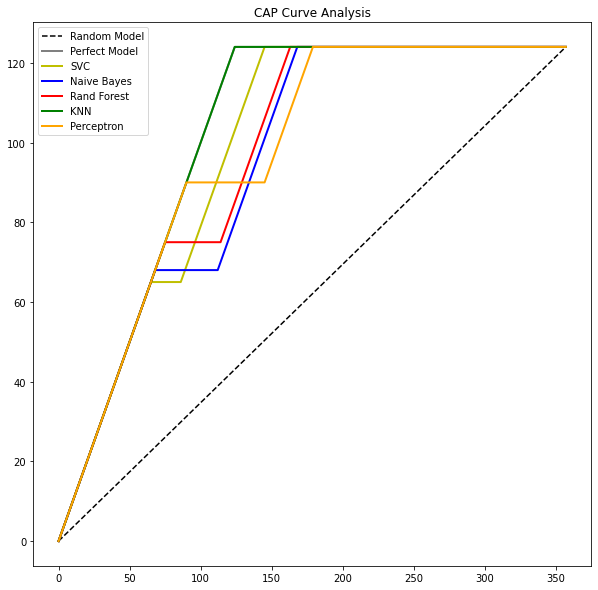

In [66]:
#CAP Analysis(cumulative accuracy profile)
total = len(y_test) 
one_count = np.sum(y_test) 
zero_count = total - one_count 

lm_NB = [y for _, y in sorted(zip(y_pred_NB, y_test), reverse = True)] 
lm_SVC = [y for _, y in sorted(zip(y_pred_SVC, y_test), reverse = True)] 
lm_RandFor = [y for _, y in sorted(zip(y_pred_rf, y_test), reverse = True)] 
lm_KNN = [y for _, y in sorted(zip(y_pred_KNN,y_test),reverse=True)]
lm_perc = [y for _, y in sorted(zip(y_pred_ptorn,y_test),reverse=True)]

x = np.arange(0, total + 1) 
y_NB = np.append([0], np.cumsum(lm_NB)) 
y_SVC = np.append([0], np.cumsum(lm_SVC)) 
y_RandFor = np.append([0], np.cumsum(lm_RandFor)) 
y_KNN = np.append([0],np.cumsum(lm_KNN))
y_perc = np.append([0],np.cumsum(lm_perc))

plt.figure(figsize = (10, 10))
plt.title('CAP Curve Analysis')
plt.plot([0, total], [0, one_count], c = 'k', linestyle = '--', label = 'Random Model')
plt.plot([0, one_count, total], [0, one_count, one_count], c = 'grey', linewidth = 2, label = 'Perfect Model') 
plt.plot(x, y_SVC, c = 'y', label = 'SVC', linewidth = 2)
plt.plot(x, y_NB, c = 'b', label = 'Naive Bayes', linewidth = 2)
plt.plot(x, y_RandFor, c = 'r', label = 'Rand Forest', linewidth = 2)
plt.plot(x,y_KNN , c= 'g' , label = 'KNN', linewidth =2)
plt.plot(x,y_perc, c='orange',label ='Perceptron',linewidth=2)

plt.legend()